##In this project, we are going to analyze some information about properties for sale in Bogotá, Colombia

In [1]:
from google.colab import drive 

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 

inmuebles = pd.read_csv("/content/drive/MyDrive/inmuebles_bogota.csv")
inmuebles.head()


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
inmuebles.shape

(9520, 8)

In [4]:
inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

## We change the names with special characters to avoid issues


In [5]:
columnas = {'Baños':'Banos', 'Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
7147,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,76,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 340.000.000
6274,Apartamento,Apartamento en venta en Bosa,3,1,42,Bosa,Bosa Central,$ 113.000.000
7823,Apartamento,Apartamento en venta en Suba,3,2,47,Suba,Suba,$ 150.000.000
6432,Apartamento,Apartamento en venta en Cedritos,3,3,92,Cedritos,Usaquén,$ 720.000.000
2693,Apartamento,Apartamento en venta en Hayuelos,3,2,57,Hayuelos,Modelia,$ 225.000.000
3605,Apartamento,Apartamento en venta en Chico Norte,3,4,120,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 660.000.000
1389,Apartamento,Apartamento en venta en Usaquén,3,3,108,Usaquén,Usaquén,$ 570.000.000
5124,Apartamento,Apartamento en venta en Bella Suiza,1,2,56,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 360.000.000
857,Apartamento,Apartamento en venta en Cedritos,2,2,72,Cedritos,Usaquén,$ 490.000.000
3079,Apartamento,Apartamento en venta en El Batán,2,2,80,El Batán,La Alhambra,$ 460.000.000


In [6]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [7]:
inmuebles.iloc[300]

Tipo                                Apartamento
Descripcion     Apartamento en venta en Kennedy
Habitaciones                                  2
Banos                                         1
Area                                         42
Barrio                                  Kennedy
UPZ                             Kennedy Central
Valor                             $ 116.100.000
Name: 300, dtype: object

In [8]:
inmuebles.iloc[300:305
               ]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
300,Apartamento,Apartamento en venta en Kennedy,2,1,42,Kennedy,Kennedy Central,$ 116.100.000
301,Apartamento,Apartamento en venta en Chico Norte,2,2,95,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 980.000.000
302,Apartamento,Apartamento en venta en Kennedy,3,2,54,Kennedy,Kennedy Central,$ 237.000.000
303,Apartamento,Apartamento en venta en Kennedy,3,2,67,Kennedy,Kennedy Central,$ 320.000.000
304,Apartamento,Apartamento en venta en Cedritos,4,4,132,Cedritos,Usaquén,$ 530.000.000


In [9]:
inmuebles["Valor"][300]

'$ 116.100.000'

In [10]:
type(inmuebles["Valor"][300:305])

pandas.core.series.Series

In [11]:
inmuebles.Area.mean()

146.66470588235293

In [12]:
(inmuebles.Barrio == "Chico Reservado")

0       False
1       False
2        True
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Barrio, Length: 9520, dtype: bool

In [13]:
sum(inmuebles.Barrio == "Chico Reservado")

225

## How many properties are currently in Chico Reservado neighborhood ?

In [14]:
prop_chico_reservado = inmuebles.Barrio == "Chico Reservado"

In [15]:
chico_reservado = inmuebles[prop_chico_reservado]
chico_reservado

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000
...,...,...,...,...,...,...,...,...
9299,Apartamento,Apartamento en venta en Chico Reservado,3,3,148,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 780.000.000
9335,Apartamento,Apartamento en venta en Chico Reservado,3,3,176,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9341,Apartamento,Apartamento en venta en Chico Reservado,2,3,118,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 700.000.000
9472,Apartamento,Apartamento en venta en Chico Reservado,3,1,49,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 200.000.000


## The mean of the area in properties located in Chico Reservado 

In [16]:
chico_reservado.Area.mean()

142.78666666666666

##The mean of the area in properties in all the dataset


In [17]:
inmuebles.Area.mean()

146.66470588235293

## How many neighborhoods are in this dataset ?

In [18]:
len(inmuebles.Barrio.value_counts())

149

In [19]:
inmuebles.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [20]:
len(inmuebles.UPZ.value_counts())

63

<Axes: >

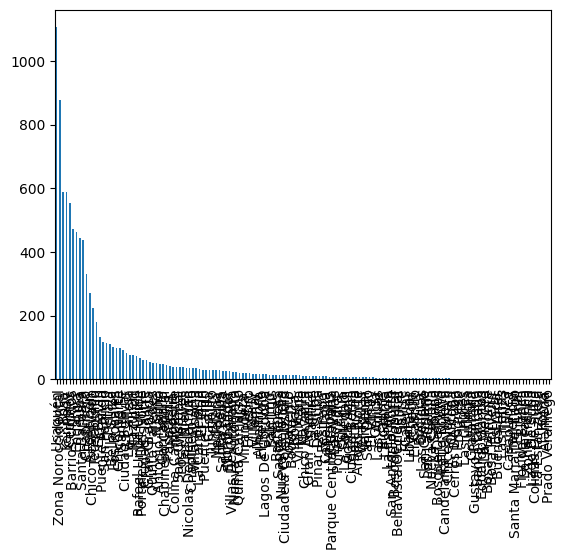

In [21]:
inmuebles_barrio = inmuebles.Barrio.value_counts()
inmuebles_barrio.plot.bar()

## Top 15 of the neighborhoods with more properties

<Axes: >

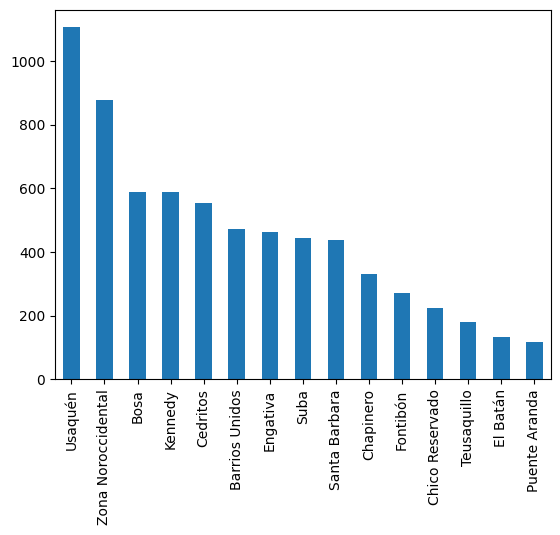

In [22]:
inmuebles_barrio.head(15).plot.bar()

In [23]:
inmuebles.Valor[0]

'$ 360.000.000'

In [24]:
type(inmuebles.Valor[0])

str

In [25]:
inmuebles.Valor[0] + inmuebles.Valor[1]+inmuebles.Valor[:5]

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

We split the special characters in order to manage better our data

In [26]:
inmuebles.Valor[0].split()

['$', '360.000.000']

In [27]:
inmuebles.Valor

0         $ 360.000.000
1         $ 670.000.000
2       $ 1.120.000.000
3         $ 890.000.000
4         $ 970.000.000
             ...       
9515      $ 290.000.000
9516      $ 670.000.000
9517      $ 900.000.000
9518      $ 335.000.000
9519      $ 144.990.000
Name: Valor, Length: 9520, dtype: object

In [28]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
510,Apartamento,Apartamento en venta en Kennedy,3,2,77,Kennedy,Kennedy Central,$ 390.000.000,$,390.000.000
9390,Casa,Casa en venta en Suba,5,5,180,Suba,Suba,$ 360.000.000,$,360.000.000
1321,Apartamento,Apartamento en venta en Usaquén,4,3,104,Usaquén,Usaquén,$ 666.000.000,$,666.000.000


In [29]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [30]:
inmuebles

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970.000.000
...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335.000.000


In [31]:
inmuebles.loc[:, "Moneda"] = "COP"

In [32]:
inmuebles

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,COP,360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,COP,670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,COP,1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,COP,890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,COP,970.000.000
...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,COP,290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,COP,670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,COP,900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,COP,335.000.000


At this point the type of my data is still an object type

In [33]:
inmuebles["Valor"].sum()

'$ 360.000.000$ 670.000.000$ 1.120.000.000$ 890.000.000$ 970.000.000$ 510.000.000$ 500.000.000$ 2.350.000.000$ 850.000.000$ 642.000.000$ 652.000.000$ 168.000.000$ 205.000.000$ 300.000.000$ 680.000.000$ 2.519.000.000$ 420.000.000$ 620.000.000$ 239.000.000$ 1.600.000.000$ 420.000.000$ 625.000.000$ 2.799.000.000$ 1.450.000.000$ 2.000.000.000$ 670.000.000$ 1.800.000.000$ 469.000.000$ 580.000.000$ 445.000.000$ 261.500.000$ 278.000.000$ 258.000.000$ 520.000.000$ 200.000.000$ 129.000.000$ 350.000.000$ 290.500.000$ 750.000.000$ 495.000.000$ 285.000.000$ 900.000.000$ 1.800.000.000$ 990.000.000$ 418.000.000$ 349.000.000$ 565.000.000$ 370.000.000$ 259.000.000$ 310.000.000$ 354.000.000$ 372.000.000$ 500.000.000$ 420.000.000$ 1.050.000.000$ 185.000.000$ 349.000.000$ 515.000.000$ 287.000.000$ 265.000.000$ 500.000.000$ 261.500.000$ 300.000.000$ 278.000.000$ 258.000.000$ 520.000.000$ 350.000.000$ 290.500.000$ 129.000.000$ 200.000.000$ 750.000.000$ 418.000.000$ 495.000.000$ 349.000.000$ 310.000.000$ 56

Delete the . in the Valor entries and changed for empty 

In [34]:
inmuebles["Valor"] = inmuebles["Valor"].str.replace(".", "", regex = True)

In [35]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [36]:
inmuebles[["Valor", "Barrio"]]

,Valor,Barrio
0,$ 360000000,Zona Noroccidental
1,$ 670000000,Castilla
2,$ 1120000000,Chico Reservado
3,$ 890000000,Usaquén
4,$ 970000000,Bella Suiza
...,...,...
9515,$ 290000000,Kennedy
9516,$ 670000000,Parque Central Bavaria
9517,$ 900000000,Restrepo
9518,$ 335000000,Engativa


In [37]:
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
9183,Apartamento,Apartamento en venta en Chico Reservado,1,2,62,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 480000000,COP,480.000.000


Now we are changing the "$" character for empthy, in order to get only a number for the entries in the objetc "Valor"

In [38]:
inmuebles["Valor"] = inmuebles["Valor"].str.replace("$", "", regex = True)

In [39]:
inmuebles["Precio_en_millones"] = inmuebles.Valor.astype("float")/1000000


In [40]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_en_millones
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [41]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_en_millones
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [42]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_en_millones
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,480000000,COP,480.000.000,480.00


In [43]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_en_millones
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,180000000,COP,180.000.000,180.00


Plot the distribution of prices in cop 


Text(0.5, 1.0, 'Distribution of prices in Million COP')

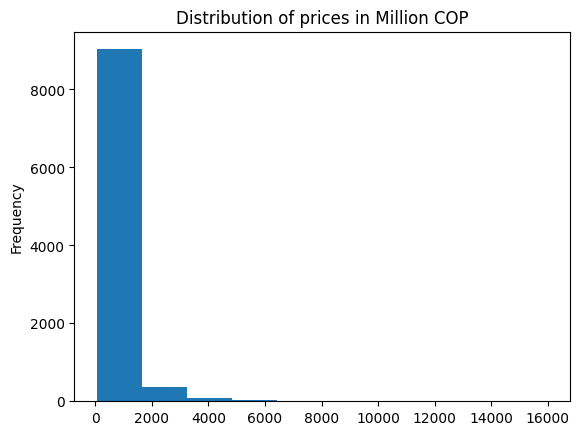

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

grafica1 = inmuebles["Precio_en_millones"].plot.hist(bins=10) 
grafica1.set_title('Distribution of prices in Million COP') 


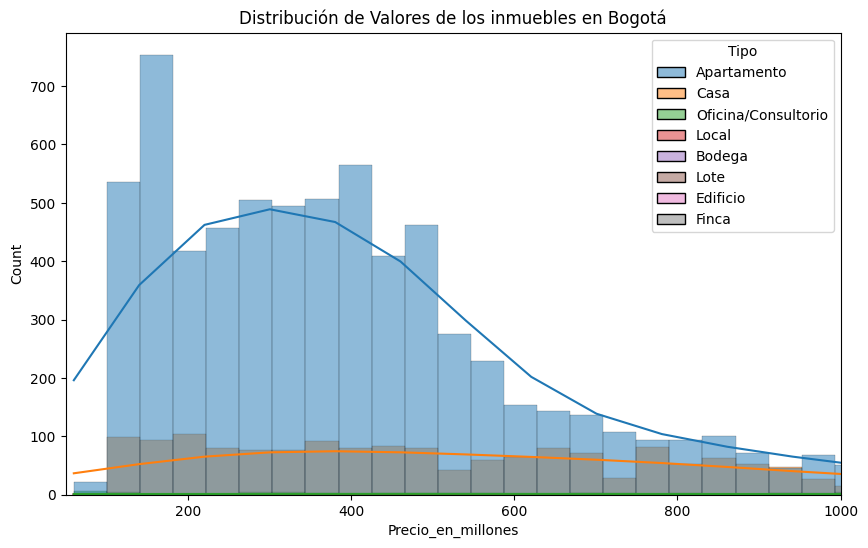

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x="Precio_en_millones", kde=True, hue = "Tipo")
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.savefig("/content/drive/MyDrive/valor_inmuebles.png", format ="png") 
plt.show()

In [46]:
barrios_bogota = inmuebles['Barrio']

## Create a column of the price for m2 per property 

In [47]:

inmuebles['Valor_m2_Millon'] = inmuebles['Precio_en_millones'] / inmuebles['Area']

In [48]:
inmuebles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tipo                9520 non-null   object 
 1   Descripcion         9520 non-null   object 
 2   Habitaciones        9520 non-null   int64  
 3   Banos               9520 non-null   int64  
 4   Area                9520 non-null   int64  
 5   Barrio              9520 non-null   object 
 6   UPZ                 9478 non-null   object 
 7   Valor               9520 non-null   object 
 8   Moneda              9520 non-null   object 
 9   Precio              9520 non-null   object 
 10  Precio_en_millones  9520 non-null   float64
 11  Valor_m2_Millon     9520 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 892.6+ KB


In [49]:
inmuebles.groupby("Barrio").mean()

,Habitaciones,Banos,Area,Precio_en_millones,Valor_m2_Millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


In [50]:
datos_barrio = inmuebles.groupby("Barrio").sum()
datos_barrio 

,Habitaciones,Banos,Area,Precio_en_millones,Valor_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [51]:
datos_barrio["Valor_m2_Barrio"] = datos_barrio["Precio_en_millones"]/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_en_millones,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


In [52]:
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

We add the mean of the price in the neighborhood next to the price of the specific property to compare respect by the mean 

In [53]:
inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_en_millones,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000,COP,360.000.000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670000000,COP,670.000.000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120000000,COP,1.120.000.000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890000000,COP,890.000.000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970000000,COP,970.000.000,970.00,7.58,6.29


the top 10 of neighborhoods with more values

In [54]:
top_barrios = inmuebles['Barrio'].value_counts()[:10].index

In [55]:
datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_en_millones,Valor_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [56]:
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_en_millones,Valor_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


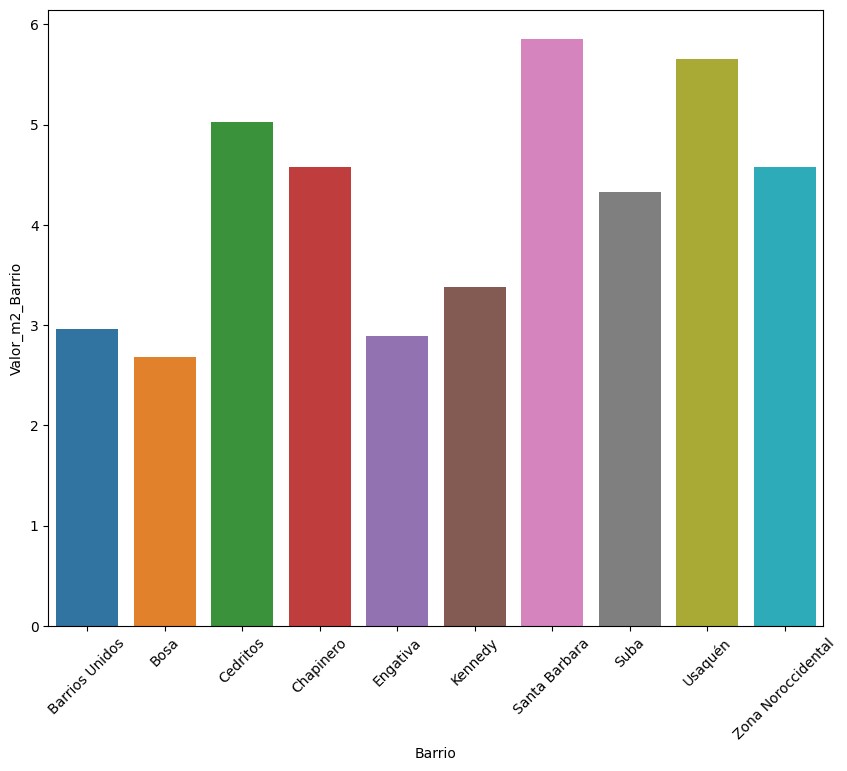

In [57]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Barrio", y="Valor_m2_Barrio", data = datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis="x", rotation=45)



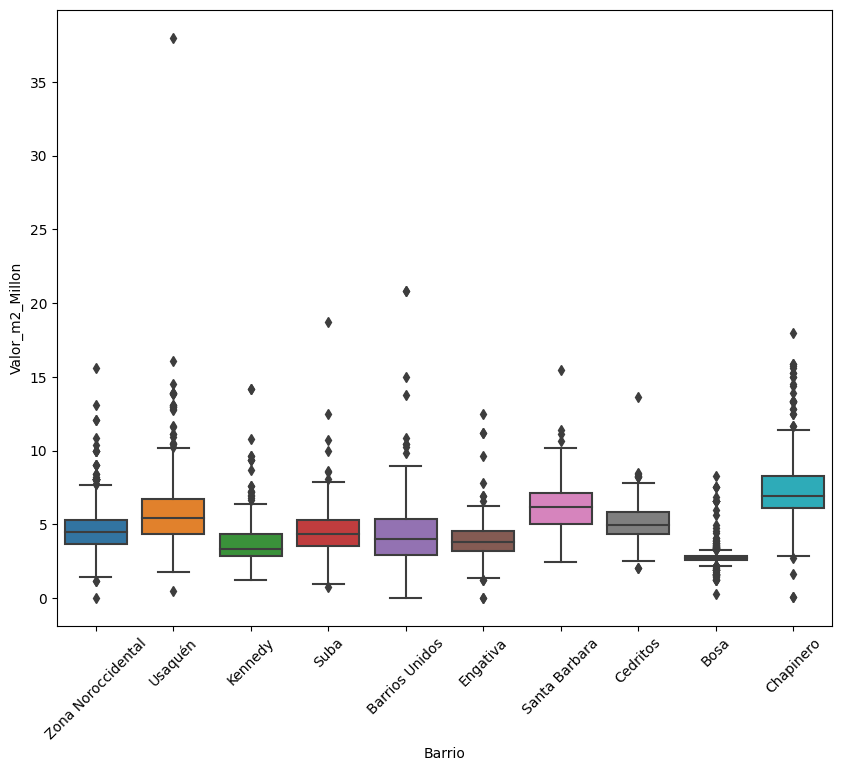

In [58]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Valor_m2_Millon", data = inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis="x", rotation=45)
plt.show()


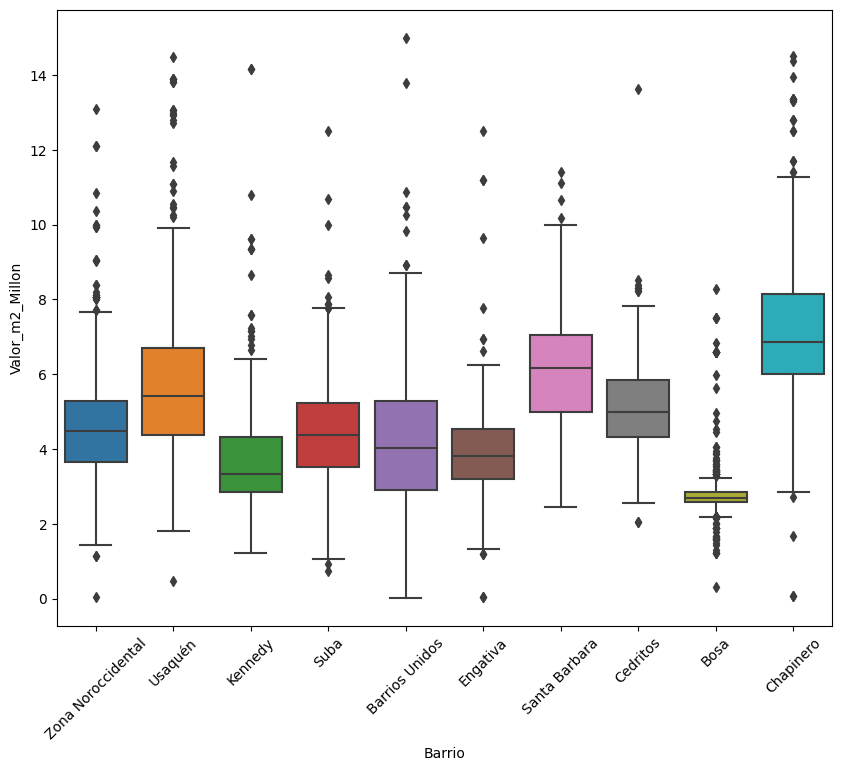

In [59]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Valor_m2_Millon", data = inmuebles.query('Barrio in @top_barrios & Valor_m2_Millon <15'))
ax.tick_params(axis="x", rotation=45)
plt.show()

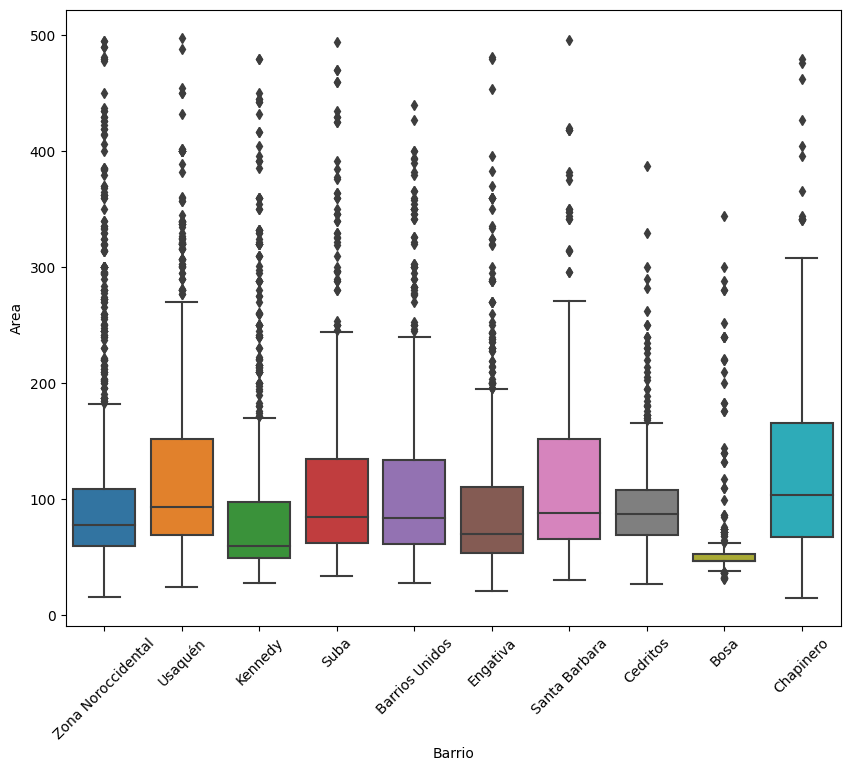

In [60]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Area", data = inmuebles.query('Barrio in @top_barrios & Area <500'))
ax.tick_params(axis="x", rotation=45)
plt.show()

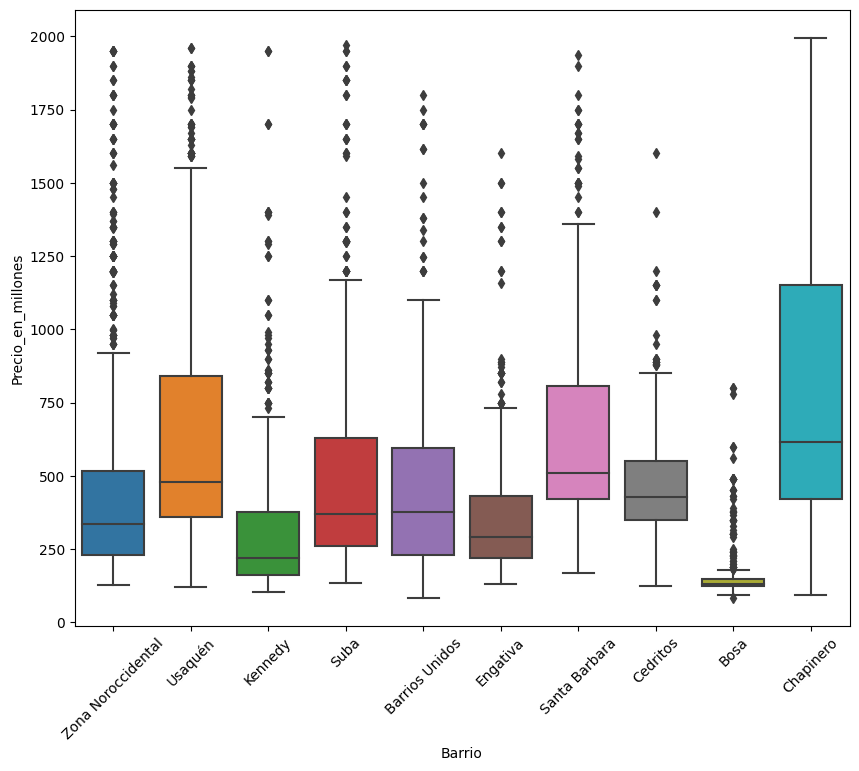

In [61]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Barrio", y="Precio_en_millones", data = inmuebles.query('Barrio in @top_barrios & Precio_en_millones <2000'))
ax.tick_params(axis="x", rotation=45)
plt.show()

## Upload additional information in new datasets

In [62]:
datos_raw = pd.read_csv("/content/drive/MyDrive/Identificación (Capítulo A).csv", sep = ";", encoding="latin-1")
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [63]:
datos_raw.shape

(106467, 11)

## We filter all the information of this Dataset in order to get only info related to Bogota, which has the "MPIO" code = 11001

In [64]:
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

## Add new datasets in order to get more detailed information 

In [65]:
datos_b = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Datos de la vivenda y su entorno (Capítulo B).csv", sep = ";", encoding="latin-1")
datos_c = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Condiciones habitacionales del hogar (Capítulo C).csv", sep = ";", encoding="latin-1")
datos_e = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Composición del hogar y demografía (Capítulo E).csv", sep = ";", encoding="latin-1")
datos_h = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Educación (Capítulo H).csv", sep = ";", encoding="latin-1")
datos_l = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv", sep = ";", encoding="latin-1")
datos_k = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Fuerza de trabajo (Capítulo K).csv", sep = ";", encoding="latin-1")


<ipython-input-65-e4091755b7fe>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Condiciones habitacionales del hogar (Capítulo C).csv", sep = ";", encoding="latin-1")
<ipython-input-65-e4091755b7fe>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Composición del hogar y demografía (Capítulo E).csv", sep = ";", encoding="latin-1")
<ipython-input-65-e4091755b7fe>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /Educación (Capítulo H).csv", sep = ";", encoding="latin-1")
<ipython-input-65-e4091755b7fe>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on impo

In [66]:
datos_dane = pd.merge(datos_raw, datos_b, on ='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [67]:
datos_dane = pd.merge(datos_dane, datos_c, on ='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [68]:
datos_dane = pd.merge(datos_dane, datos_e, on ='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-68-5fe57e36e7b4>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane, datos_e, on ='DIRECTORIO', how='left')


(238559, 281)

In [69]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


## At this point, we upload a cleaned CSV which is more efficient to do our analysis 

In [70]:
datos_dane = pd.read_csv("/content/drive/MyDrive/datos_dane.csv")
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [71]:
datos_dane.shape

(9857, 55)

We are going to change the name of the columns to names with easier names to understanding the Dataset 

In [73]:

dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns


Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [74]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

We filter our data by each UPZ with the most important features computing the mean 

In [75]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


In [76]:
datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.00,1.00,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.00,1.00,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.00,1.00,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.00,1.00,0,1,0


In [81]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados 

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


## We are going to join the Dataset inmuebles, with the Dataset with socioeconomic information about people in different places

In [97]:
pd.merge(inmuebles, datos_tratados, left_on="UPZ", right_on="NOMBRE_ESTRATO", how = "left")

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000,COP,360.000.000,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670000000,COP,670.000.000,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120000000,COP,1.120.000.000,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890000000,COP,890.000.000,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970000000,COP,970.000.000,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,290000000,COP,290.000.000,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,670000000,COP,670.000.000,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,900000000,COP,900.000.000,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,335000000,COP,335.000.000,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [98]:
datos_ml = pd.merge(inmuebles, datos_tratados, left_on="UPZ", right_on="NOMBRE_ESTRATO", how = "left")
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_en_millones        9520 non-null   float64
 11  Valor_m2_Millon           9520 non-null   float64
 12  Valor_m2_Barrio           9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [99]:
upz = pd.read_csv("/content/drive/MyDrive/proyecto_inmobiliario /cod_upz.csv")
datos_ml = pd.merge(datos_ml, upz, left_on="UPZ", right_on="NOMBRE_ESTRATO", how = "inner")
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000,COP,360.000.000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,300000000,COP,300.000.000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2519000000,COP,2.519.000.000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,239000000,COP,239.000.000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,1600000000,COP,1.600.000.000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [100]:
datos_ml.shape

(9318, 26)

In [101]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_en_millones        9318 non-null   float64
 11  Valor_m2_Millon           9318 non-null   float64
 12  Valor_m2_Barrio           9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

<Axes: ylabel='Precio_en_millones'>

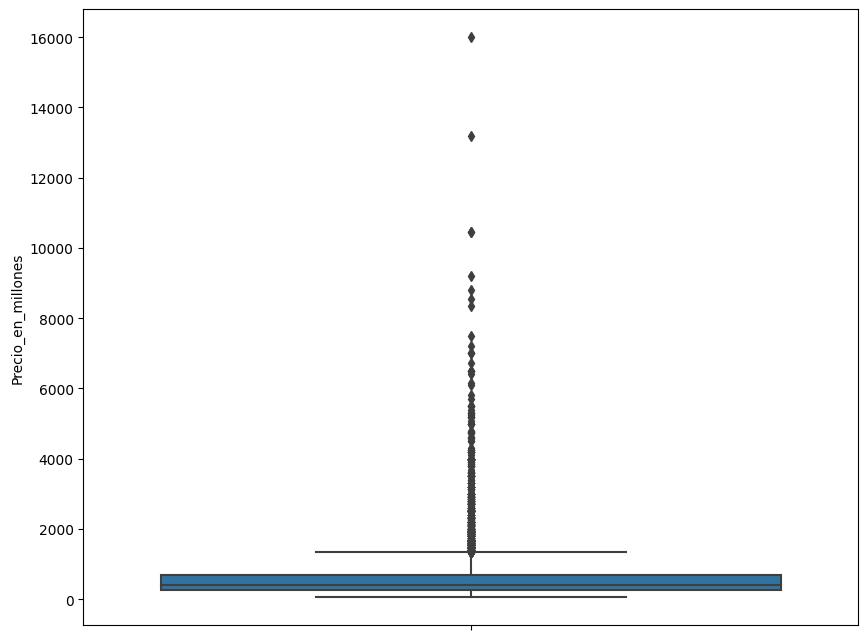

In [102]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = "Precio_en_millones")

We have to delete outlayers that are outside of the range

In [135]:
datos_ml = datos_ml.query('Precio_en_millones < 1200 & Precio_en_millones > 60') 
datos_ml.shape

(8313, 27)

<Axes: ylabel='Precio_en_millones'>

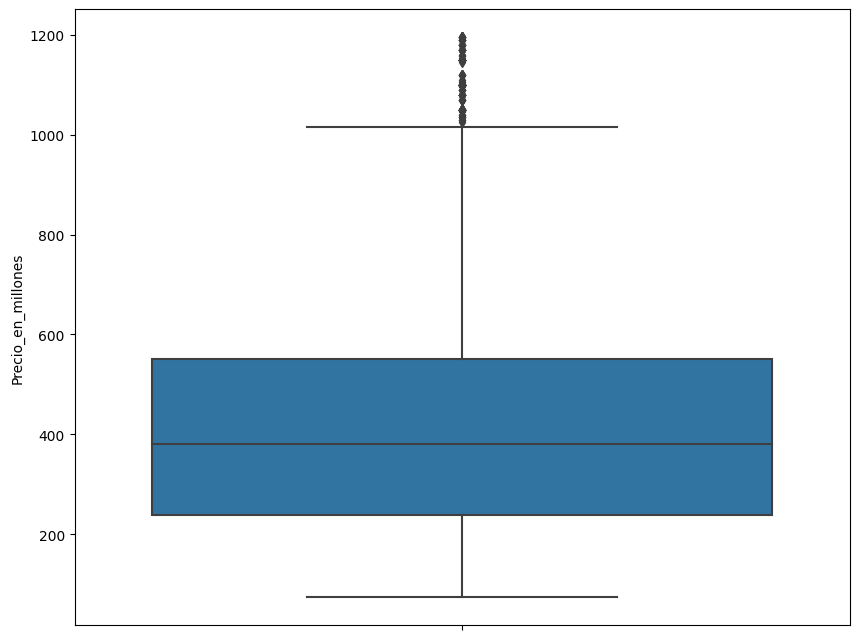

In [136]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y = "Precio_en_millones")

In [137]:
datos_ml["SALARIO_ANUAL_MI"] = datos_ml['SALARIO_MES']*12 /1000000 
datos_ml["SALARIO_ANUAL_MI"]

<ipython-input-137-158b5ae66224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ml["SALARIO_ANUAL_MI"] = datos_ml['SALARIO_MES']*12 /1000000


0      48.42
1      48.42
3      48.42
9      48.42
10     48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_MI, Length: 8313, dtype: float64

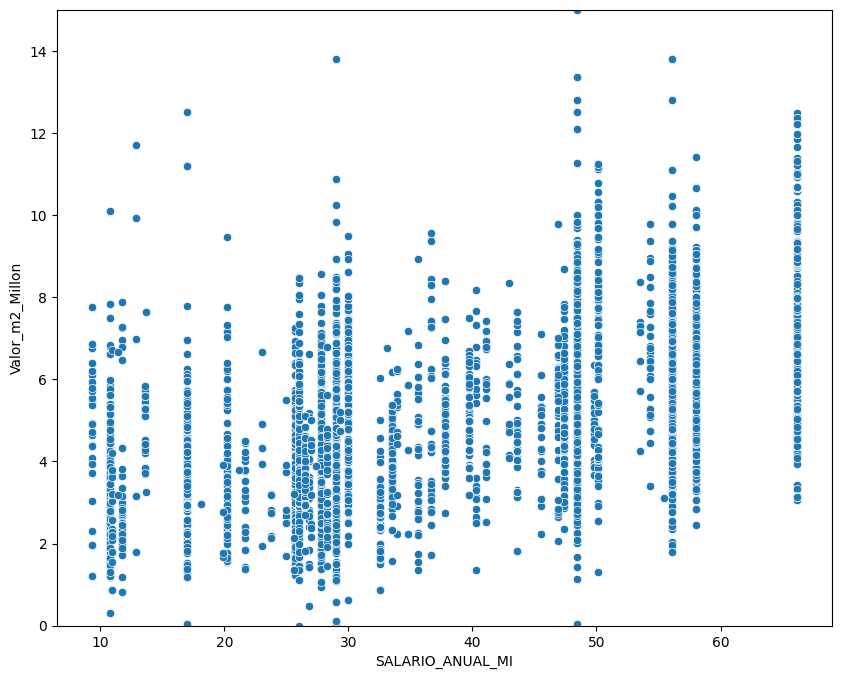

In [138]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x ="SALARIO_ANUAL_MI" , y = "Valor_m2_Millon")
plt.ylim((0,15))
plt.show()

In [139]:
datos_ml.corr()

,Habitaciones,Banos,Area,Precio_en_millones,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.44,0.03,0.18,-0.31,-0.21,-0.12,0.13,0.08,0.11,0.14,0.11,-0.17,-0.08,0.07,0.13,0.09,-0.12,-0.17
Banos,0.44,1.00,0.04,0.66,-0.03,0.13,0.16,-0.19,-0.17,-0.12,-0.17,-0.21,0.18,0.13,-0.09,-0.15,-0.08,0.01,0.18
Area,0.03,0.04,1.00,0.04,-0.04,-0.04,-0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.01,-0.01,-0.01
Precio_en_millones,0.18,0.66,0.04,1.00,0.36,0.40,0.32,-0.37,-0.28,-0.23,-0.35,-0.38,0.42,0.21,-0.17,-0.32,-0.18,0.17,0.42
Valor_m2_Millon,-0.31,-0.03,-0.04,0.36,1.00,0.49,0.33,-0.37,-0.29,-0.22,-0.37,-0.35,0.46,0.23,-0.20,-0.36,-0.21,0.26,0.46
Valor_m2_Barrio,-0.21,0.13,-0.04,0.40,0.49,1.00,0.65,-0.66,-0.38,-0.41,-0.66,-0.60,0.82,0.41,-0.31,-0.65,-0.23,0.41,0.82
CONJUNTO_CERRADO,-0.12,0.16,-0.01,0.32,0.33,0.65,1.00,-0.84,-0.30,-0.51,-0.70,-0.67,0.81,0.61,-0.35,-0.78,0.05,0.08,0.81
INSEGURIDAD,0.13,-0.19,-0.00,-0.37,-0.37,-0.66,-0.84,1.00,0.51,0.60,0.85,0.75,-0.82,-0.56,0.29,0.74,0.09,0.00,-0.82
TERMINALES_BUS,0.08,-0.17,-0.01,-0.28,-0.29,-0.38,-0.30,0.51,1.00,0.39,0.67,0.57,-0.51,-0.30,0.17,0.36,0.25,-0.09,-0.51
BARES_DISCO,0.11,-0.12,-0.01,-0.23,-0.22,-0.41,-0.51,0.60,0.39,1.00,0.60,0.49,-0.38,-0.25,-0.02,0.33,-0.05,0.26,-0.38


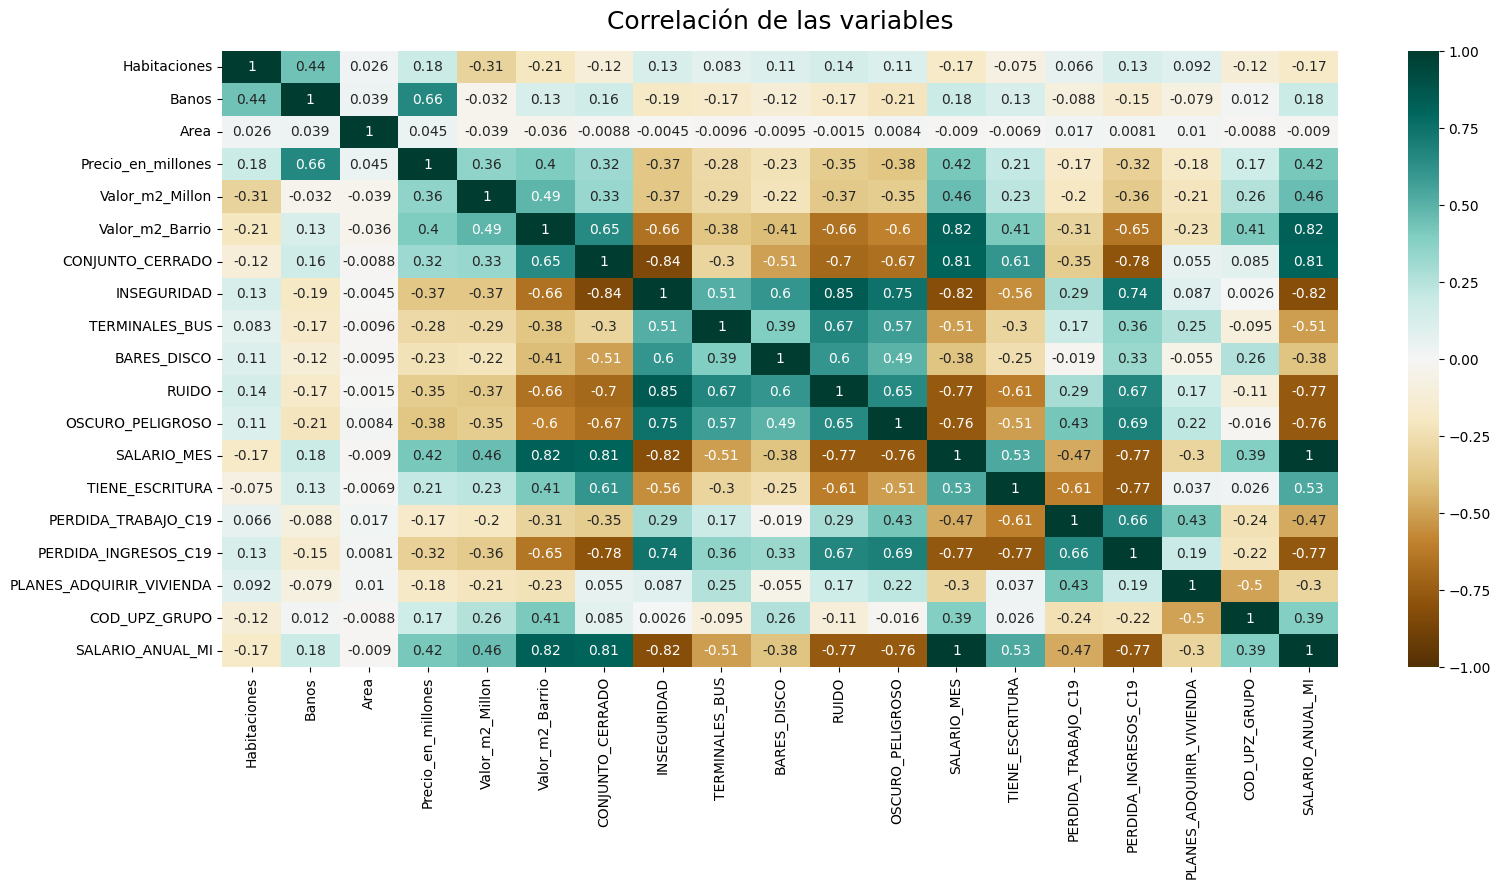

In [140]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);


## Machine learning


We are going to predict the price in millions of the assets based in different information 

In [115]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9277 entries, 0 to 9317
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9277 non-null   object 
 1   Descripcion               9277 non-null   object 
 2   Habitaciones              9277 non-null   int64  
 3   Banos                     9277 non-null   int64  
 4   Area                      9277 non-null   int64  
 5   Barrio                    9277 non-null   object 
 6   UPZ                       9277 non-null   object 
 7   Valor                     9277 non-null   object 
 8   Moneda                    9277 non-null   object 
 9   Precio                    9277 non-null   object 
 10  Precio_en_millones        9277 non-null   float64
 11  Valor_m2_Millon           9277 non-null   float64
 12  Valor_m2_Barrio           9277 non-null   float64
 13  CONJUNTO_CERRADO          9277 non-null   float64
 14  INSEGURI

In [141]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

##vamos a introducir una matriz para crear nuestra linea base
X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml['Precio_en_millones']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=99)





In [142]:
X_train

,COD_UPZ_GRUPO
1512,817.00
7864,85.00
6058,21.00
1683,817.00
2481,14.00
...,...
6038,21.00
8875,102.00
2200,14.00
3883,803.00


In [143]:
X_test

,COD_UPZ_GRUPO
6340,74.00
7805,85.00
4902,47.00
7041,100.00
2436,14.00
...,...
3323,14.00
3945,803.00
5572,27.00
3633,803.00


In [144]:
y_train

1512   1050.00
7864    129.00
6058    206.38
1683    650.00
2481    250.00
         ...  
6038    560.00
8875    560.00
2200    685.00
3883    850.00
8154    132.00
Name: Precio_en_millones, Length: 6234, dtype: float64

In [145]:
y_test

6340   199.90
7805   120.80
4902   400.00
7041   340.00
2436   355.00
        ...  
3323   700.00
3945   510.00
5572   220.00
3633   420.00
3652   435.60
Name: Precio_en_millones, Length: 2079, dtype: float64

In [146]:
modelo = LinearRegression() 

In [147]:
modelo.fit(X_train, y_train)

LinearRegression()

In [149]:
y_predict_test = modelo.predict(X_test)

In [150]:
## Se usan metricas para evaluar el modelo, valor absoluto del error, y R2 coeficiente de determinacion para ver que tan bien esta variando el modelo

from sklearn.metrics import mean_absolute_error , r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_r2 = r2_score(y_test, y_predict_test)
print(baseline_mae,baseline_r2)


187.323609443345 0.031111799984413713


In [151]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos', 'CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']] 

Y = datos_ml["Precio_en_millones"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

118.25967274431333 0.5404735562069192
123.22271988681676 0.5269614226488988


## How should be cost a property in the upz = 816, with 3 bedroom, 2 bathroom, in a condominium, with 50M anual income and with all legal paperwork according to the model 

In [152]:
modelo_1.predict([[816, 3, 2, 1, 50, 1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434.21129691])